In [1]:
import pandas as pd
df = pd.read_csv('../CA1-Dataset/CA1-Regression-Dataset.csv')
import seaborn as sns
import matplotlib.pyplot as plt
df.head()

,ID,Age,Gender,BMI,Smoker,Region,Cost ($)
0,1,19,female,27.900,yes,southwest,16884.92400
1,2,18,male,33.770,no,southeast,1725.55230
2,3,28,male,33.000,no,southeast,4449.46200
3,4,33,male,22.705,no,northwest,21984.47061
4,5,32,male,28.880,no,northwest,3866.85520


**Since the values of target variable are continous, to predict the cost, regression models should be used**

In [2]:
df.shape

(1338, 7)

# Background Research of data set
For background research, the values of Age, Gender, Smoker and Region are easy to understand. 
Age column will contains different ranges of age values. 
Gender usually contains male and female values. To sure that, I will explore later.
Smoker has yes and no values which means that person is a smoker or not. If yes, the person is a smoker and no the person is not.
Region is the probably part of the country that the patient lives and cost is the money the patient has to pay to the hospitals. 


BMI is a person’s weight in kilograms divided by the square of height in meters and it has different ranges: 
If BMI is under 18.5, it is considered as underweight.
BMI is within the healthy weight range if it is between 18.5 and less than 25.
BMI is considered overweight if it is between 25.0 and less than 30.
BMI is considered obese if it is 30.0 or greater.
reference: https://www.cdc.gov/obesity/basics/adult-defining.html#:~:text=If%20your%20BMI%20is%20less,falls%20within%20the%20obesity%20range.

# Data Exploration

From the above data set, there are 7 columns and the target column is Cost($) which have contiuous numerical values. Thes values will have to be predicted from the other independent features(ID,Age,Gender,BMI,Smoker,Region) but ID coulum may not be needed because it is just a serial number column so beofore I perform further data exploration I will drop the ID column first.

In [3]:
df= df.drop('ID',axis=1)


In [4]:
print(f'Unique values of Gender column: {df["Gender"].unique()}')
print(f'Unique values of Smoker column: {df["Smoker"].unique()}')
print(f'Unique values of Region column: {df["Region"].unique()}')


Unique values of Gender column: ['female' 'male']
Unique values of Smoker column: ['yes' 'no']
Unique values of Region column: ['southwest' 'southeast' 'northwest' 'northeast']


**The columns 'Gender','Smoker' and 'Region' seem to have categorical values and so I extracted unique values to make sure about that.**

In [5]:
#finding the summary statistics to understand the central tendency and variability of numerical features
df.describe()

,Age,BMI,Cost ($)
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


**From the above table, Age column seems to contains a variety of ranges by analysing the values of mean, standard deviation, minimum and maximum values.  
BMI also contain underweight, healthyweight, overweight and obese because minimum value is 15.96 and maximux is 53.1.  
Cost has a wide range of variation because its standard deviation is 121110.42 and mean value is 13270.422 with a wide range between minimum and maximum.**

### Finding duplicate rows

In [6]:
duplicates = df.duplicated()
duplicate_rows = df[duplicates]
print(duplicate_rows)

     Age Gender    BMI Smoker     Region   Cost ($)
581   19   male  30.59     no  northwest  1639.5631


In [7]:
# removing duplicate row
df.drop_duplicates(inplace=True)
duplicates = df.duplicated()
duplicate_rows = df[duplicates]
print(duplicate_rows)

Empty DataFrame
Columns: [Age, Gender, BMI, Smoker, Region, Cost ($)]
Index: []


**Now no duplicate row**

### 1. Finding missing values

In [8]:
#finding the null values
print(df.isnull().sum());

Age         0
Gender      0
BMI         0
Smoker      0
Region      0
Cost ($)    0
dtype: int64


**No missing values can be found**

## Data Visualization

### Drawing historgram for numerical values

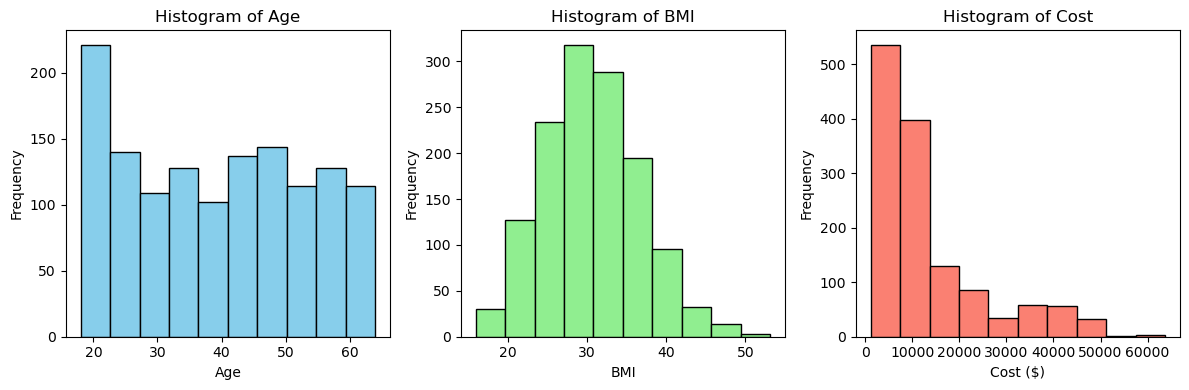

In [9]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plotting Histogram for Age
axes[0].hist(df['Age'], color='skyblue', edgecolor='black')
axes[0].set_title('Histogram of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Plotting Histogram for BMI
axes[1].hist(df['BMI'], color='lightgreen', edgecolor='black')
axes[1].set_title('Histogram of BMI')
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Frequency')

# Plotting Histogram for Cost
axes[2].hist(df['Cost ($)'], color='salmon', edgecolor='black')
axes[2].set_title('Histogram of Cost')
axes[2].set_xlabel('Cost ($)')
axes[2].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

**From the above distributions, they are not normal distributions and BMI  and Cost seem to have oultiers on higher end of distribution. To find the outliers I use boxplots**

### Drawing boxplots

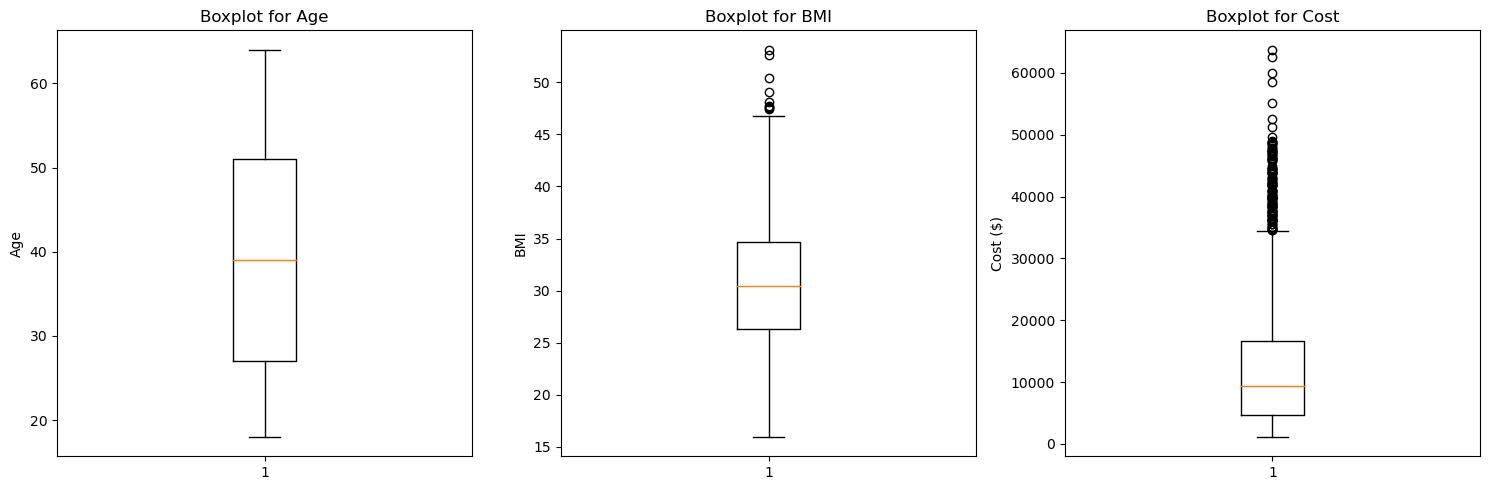

In [10]:
fig, axes = plt.subplots(1,3, figsize=(15, 5))

# Plotting Boxplot for Age
axes[0].boxplot(df['Age'])
axes[0].set_title('Boxplot for Age')
axes[0].set_ylabel('Age')

# Plotting Boxplot for BMI
axes[1].boxplot(df['BMI'])
axes[1].set_title('Boxplot for BMI')
axes[1].set_ylabel('BMI')

# Plotting Boxplot for Cost
axes[2].boxplot(df['Cost ($)'])
axes[2].set_title('Boxplot for Cost')
axes[2].set_ylabel('Cost ($)')

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

**So, BMI and Cost have outliers at higher end. and I will find the number of rows that have outliers for BMI and cost**

In [11]:
q3_bmi = df['BMI'].quantile(0.75)
q3_cost = df['Cost ($)'].quantile(0.75)

rows_greater_than_q3_bmi = df[df['BMI'] > q3_bmi].shape[0]
rows_greater_than_q3_cost = df[df['Cost ($)'] > q3_cost].shape[0]
rows_for_both_bmi_and_cost = df[(df['BMI'] > q3_bmi) | (df['Cost ($)'] > q3_cost)].shape[0]
print(f'Number of rows with BMI greater than Q3: {rows_greater_than_q3_bmi}')
print(f'Number of rows with Cost greater than Q3: {rows_greater_than_q3_cost}')
print(f'Number of rows for BMI or Cost which are greater than their respective Q3: {rows_for_both_bmi_and_cost}')

Number of rows with BMI greater than Q3: 333
Number of rows with Cost greater than Q3: 334
Number of rows for BMI or Cost which are greater than their respective Q3: 568


**So, if I simply drop the columns, I will lose 568 rows of data in total which is about 42%(568/1338 * 100) of total data rows. And
I assume that both BMI and Cost have strong correlations because whenever BMI becomes large, cost might increase. To clarify that, I will find the corrleation between these two features**

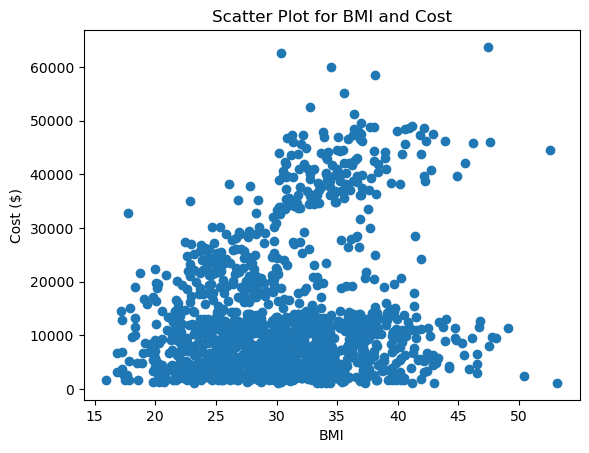

In [12]:
plt.scatter(df['BMI'], df['Cost ($)'])
plt.title('Scatter Plot for BMI and Cost')
plt.xlabel('BMI')
plt.ylabel('Cost ($)')
plt.show()

**So, from the above scatter plot, it seems like BMI and cost have a weak positive relationship because for some large BMI values
the cost increases, but for most of the large values of BMI the cost is only between 0 and 20000.**

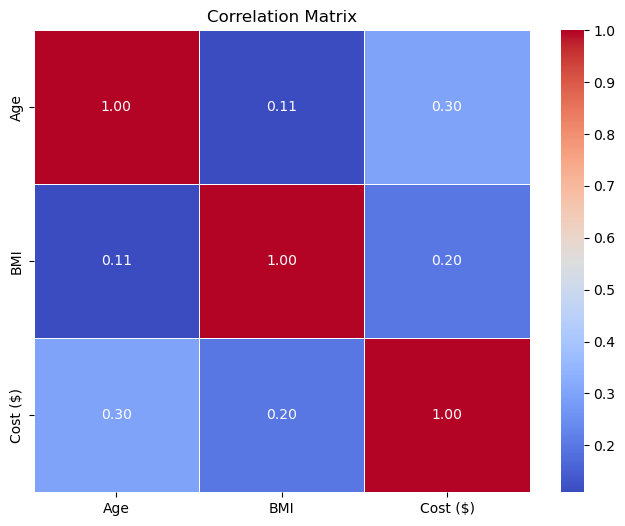

               Age       BMI  Cost ($)
Age       1.000000  0.109344  0.298308
BMI       0.109344  1.000000  0.198401
Cost ($)  0.298308  0.198401  1.000000


In [13]:
columns_for_correlation = ['Age','BMI','Cost ($)']
correlation_table = df[columns_for_correlation].corr()
import seaborn as sns


# Visualize the correlation table using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_table, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
print(correlation_table)

**So,from above Correlation Matrix, between target feature(Cost) and independent features(Age and BMI) have weak positive correlations and Age and BMI have also a weak correlation**


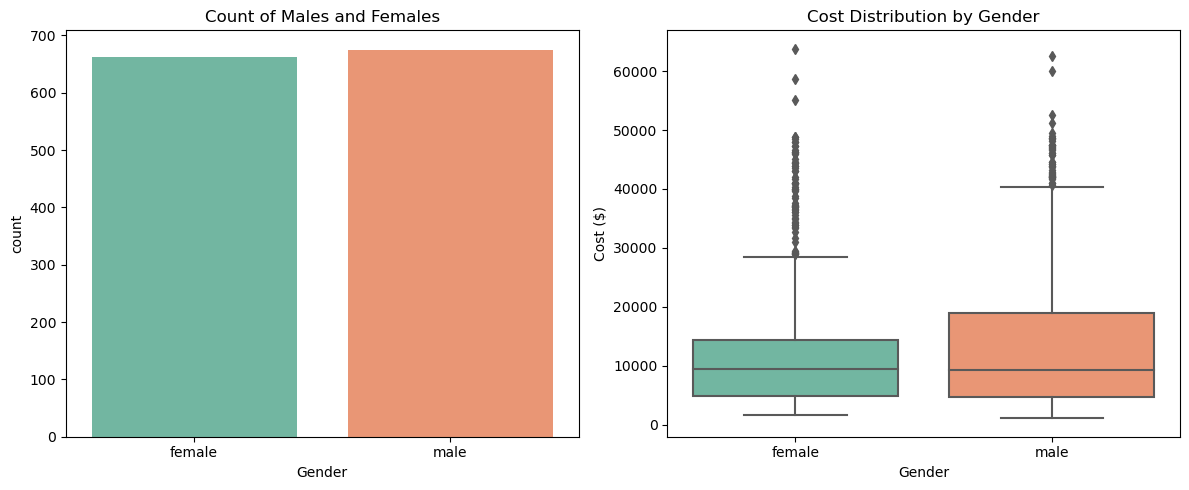

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Bar chart for Male and Female comparison
sns.countplot(x='Gender', data=df, palette='Set2', ax=axes[0])
axes[0].set_title('Count of Males and Females')

# Boxplot for Cost Distribution by Gender
sns.boxplot(x='Gender', y='Cost ($)', data=df, palette='Set2', ax=axes[1])
axes[1].set_title('Cost Distribution by Gender')

# Adjust layout
fig.tight_layout()
plt.show()

**So from the above graphs, the female and male count is nearly the same and the number of male paying higher cost is greater than the number of female**

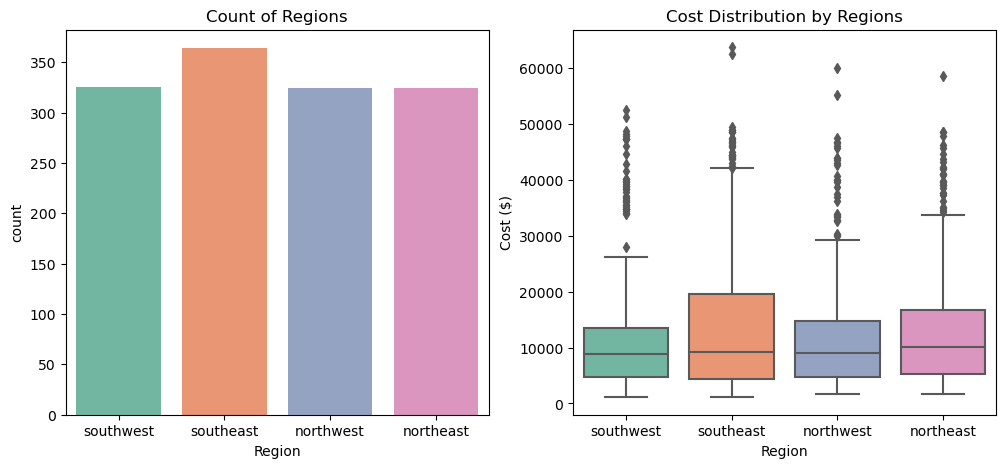

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Bar chart for Male and Female comparison
sns.countplot(x='Region', data=df, palette='Set2', ax=axes[0])
axes[0].set_title('Count of Regions')

# Boxplot for Cost Distribution by Gender
sns.boxplot(x='Region', y='Cost ($)', data=df, palette='Set2', ax=axes[1])
axes[1].set_title('Cost Distribution by Regions')

# Adjust layout

plt.show()

**From the above bar graph, the frequency of different regions is nearly the same and for the distribution, patients from southeast have to pay more and the outliers for over 60000 are from southeast.**

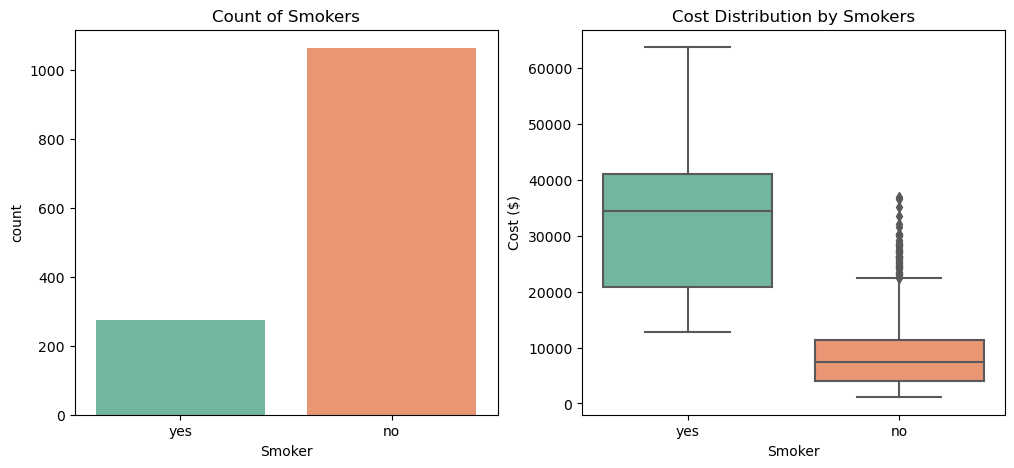

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Bar chart for Male and Female comparison
sns.countplot(x='Smoker', data=df, palette='Set2', ax=axes[0])
axes[0].set_title('Count of Smokers')

# Boxplot for Cost Distribution by Gender
sns.boxplot(x='Smoker', y='Cost ($)', data=df, palette='Set2', ax=axes[1])
axes[1].set_title('Cost Distribution by Smokers')

# Adjust layout

plt.show()

**From the above analysis, it can be seen that although the number of smokers is significantly smaller than that of non-smokers, most of the smokers have to more for hospital cost**

# Feature Engineering 

## Perform one-hot encoding for Gender, Smoker and Region 

In [17]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# Perform one-hot encoding for 'Region', 'Gender', and 'Smoker'
df_encoded = pd.get_dummies(df, columns=['Region', 'Gender', 'Smoker'], prefix=['Region', 'Gender', 'Smoker'])

# Display the encoded DataFrame
df_encoded 

,Age,BMI,Cost ($),Region_northeast,Region_northwest,Region_southeast,Region_southwest,Gender_female,Gender_male,Smoker_no,Smoker_yes
0,19,27.900,16884.92400,False,False,False,True,True,False,False,True
1,18,33.770,1725.55230,False,False,True,False,False,True,True,False
2,28,33.000,4449.46200,False,False,True,False,False,True,True,False
3,33,22.705,21984.47061,False,True,False,False,False,True,True,False
4,32,28.880,3866.85520,False,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,10600.54830,False,True,False,False,False,True,True,False
1334,18,31.920,2205.98080,True,False,False,False,True,False,True,False
1335,18,36.850,1629.83350,False,False,True,False,True,False,True,False
1336,21,25.800,2007.94500,False,False,False,True,True,False,True,False


**Now I will drop the columns of Gende_female, Smoker_no and one Region(Region_northeast) because I used one-hot encoding and this will help to reduce the number of parameters for the model** 

In [18]:
df_encoded.drop(['Region_northeast','Gender_female','Smoker_no'],axis=1,inplace=True)

In [19]:

df_encoded.rename(columns={'Gender_male': 'Gender'}, inplace=True)
df_encoded.rename(columns={'Smoker_yes':'Smoker'},inplace=True)
df_encoded

,Age,BMI,Cost ($),Region_northwest,Region_southeast,Region_southwest,Gender,Smoker
0,19,27.900,16884.92400,False,False,True,False,True
1,18,33.770,1725.55230,False,True,False,True,False
2,28,33.000,4449.46200,False,True,False,True,False
3,33,22.705,21984.47061,True,False,False,True,False
4,32,28.880,3866.85520,True,False,False,True,False
...,...,...,...,...,...,...,...,...
1333,50,30.970,10600.54830,True,False,False,True,False
1334,18,31.920,2205.98080,False,False,False,False,False
1335,18,36.850,1629.83350,False,True,False,False,False
1336,21,25.800,2007.94500,False,False,True,False,False


## Binning BMI to get categorical values
Now, I try to bin BMI in four categorical ranges  
1.<18.5(Underweight)  
2.greater than 18.5 and less than 25(obese)   
3.greater than 25 and less than 30 (overweight)  
4.gretaer than 30(obese)  
I perform this binning because there is only a weak positive correlation between BMI and Cost. Moreover, outliers will have less impact on the model .

In [20]:
df_encoded['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 25, 30, float('inf')],
                            labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

In [21]:
print(df_encoded[['BMI','BMI_Category']])

         BMI BMI_Category
0     27.900   Overweight
1     33.770        Obese
2     33.000        Obese
3     22.705       Normal
4     28.880   Overweight
...      ...          ...
1333  30.970        Obese
1334  31.920        Obese
1335  36.850        Obese
1336  25.800   Overweight
1337  29.070   Overweight

[1337 rows x 2 columns]


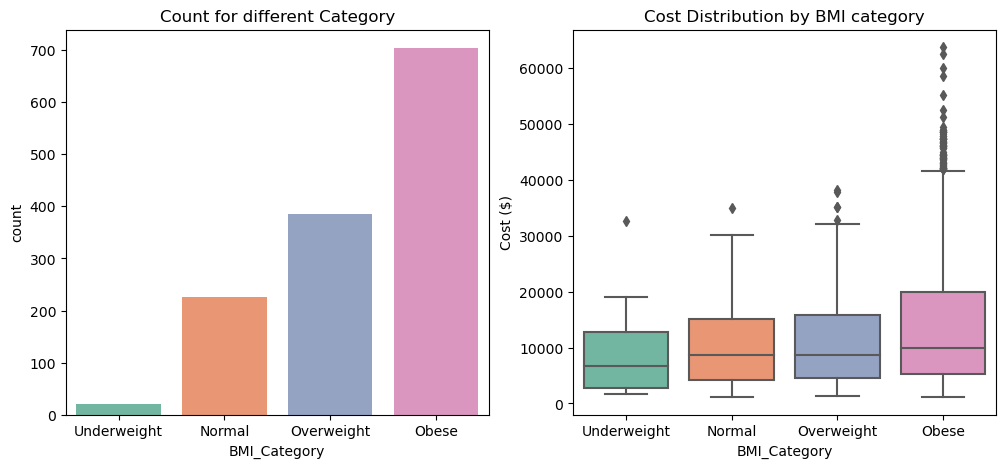

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart for BMI_category
sns.countplot(x='BMI_Category', data=df_encoded, palette='Set2', ax=axes[0])
axes[0].set_title('Count for different Category')

# Boxplot for Cost Distribution by Gender
sns.boxplot(x='BMI_Category', y='Cost ($)', data=df_encoded, palette='Set2', ax=axes[1])
axes[1].set_title('Cost Distribution by BMI category')

# Adjust layout

plt.show()

**Now, the data is more interpretable because according to the Obese boxplot, patients who are obese have more cost charges.**

## Label Encoding for BMI_Category 
**Now I perform label encoding for further model training. I perfrom label encoding for BMI catergory because there is a rank relationship between BMI categories, for example Underweight<Normal<Overweigth<Obese**

In [23]:
bmi_map = {'Underweight': 0, 'Normal': 1, 'Overweight': 2, 'Obese': 3}
df_encoded['BMI_Category'] = df_encoded['BMI_Category'].map(bmi_map)


df_encoded.head(10)

In [24]:
df_encoded['BMI_Category'].unique()

[2, 3, 1, 0]
Categories (4, int64): [0 < 1 < 2 < 3]

In [25]:
df_encoded['BMI_Category'].isnull().sum()

0

## Modelling and Evaluation 

In [26]:
from sklearn.model_selection import train_test_split

# Features (X) and Target (y)
X = df_encoded.drop("Cost ($)", axis=1)  # Features excluding the target column
y = df_encoded["Cost ($)"]  # Target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (1069, 8) (1069,)
Testing set shape: (268, 8) (268,)


In [27]:
#importing models, crossvalidation scores
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor



# Models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors Regression': KNeighborsRegressor()
}

# Scoring metrics
scoring_metrics = {
    'Mean Squared Error': 'neg_mean_squared_error',
    'R-squared': 'r2'
}

# Number of splits for cross-validation
num_splits = 5  # You can adjust this based on your preference

# Perform cross-validation and record the mean scores
mean_scores = {metric: {} for metric in scoring_metrics}

for model_name, model in models.items():
    kfold = KFold(n_splits=num_splits, shuffle=True, random_state=42)
    for metric_name, scoring_metric in scoring_metrics.items():
        if scoring_metric=='neg_mean_squared_error':
            scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring_metric)
            mean_score = -scores.mean()
            mean_scores[metric_name][model_name] = mean_score
        else:
            scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring_metric)
            mean_score = scores.mean()
            mean_scores[metric_name][model_name] = mean_score

# Find the best model for each metric
best_model_for_mean_squared_error = {metric: min(models, key=lambda m: mean_scores[metric][m]) for metric in scoring_metrics if metric=='Mean Squared Error'}
best_model_for_r2_score = {metric: max(models, key=lambda m: mean_scores[metric][m]) for metric in scoring_metrics if metric=='R-squared'}
# Print results
for metric_name, metric_scores in mean_scores.items():
    print(f"\n{metric_name} Scores:")
    for model_name, score in metric_scores.items():
        print(f"{model_name}: {score}")

   
print(f"\nBest Model for Mean Square Error: {best_model_for_mean_squared_error['Mean Squared Error']} with a score of {min(mean_scores['Mean Squared Error'].values())}")
print(f"Best Model for R2_score: {best_model_for_r2_score['R-squared']} with a score of {max(mean_scores['R-squared'].values())}")



Mean Squared Error Scores:
Linear Regression: 37382050.77166387
Decision Tree Regression: 44670209.856171526
Support Vector Regression: 150536439.08992678
K-Nearest Neighbors Regression: 125284518.8796374

R-squared Scores:
Linear Regression: 0.7239807270952566
Decision Tree Regression: 0.6586020097448572
Support Vector Regression: -0.10137439336353675
K-Nearest Neighbors Regression: 0.07644096596821315

Best Model for Mean Square Error: Linear Regression with a score of 37382050.77166387
Best Model for R2_score: Linear Regression with a score of 0.7239807270952566


### So, From the analysis of different models Linear Regression model is the best according to Mean Square Error and R2_score.

In [28]:
import math
rmse_dict = {model :math.sqrt(mse) for model, mse in mean_scores['Mean Squared Error'].items()}
print(rmse_dict)

{'Linear Regression': 6114.086258114443, 'Decision Tree Regression': 6683.577624010327, 'Support Vector Regression': 12269.329202932277, 'K-Nearest Neighbors Regression': 11193.056726365565}


### So, for the Root mean squared error , Linear Regression is still the best. 

## Analysing the residual plot for Linear Regression model

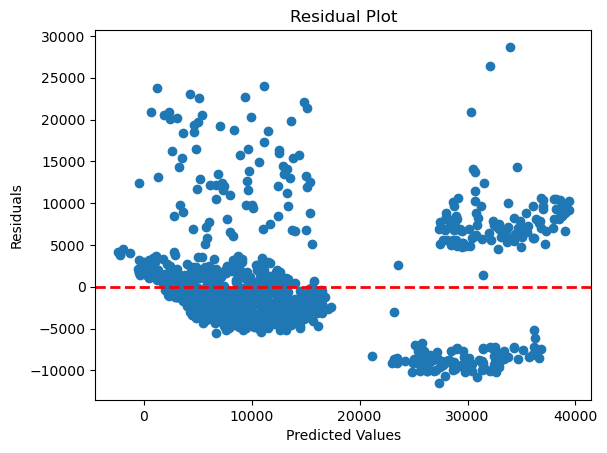

In [29]:
#modelling
model = LinearRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_train)

residuals = y_train-y_predict

# drawing scatter plot for residuals and predicted values


plt.scatter(y_predict, residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)  # Add a horizontal line at y=0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

**So,according to the residual plot, it can be seen that the pattern is heteroskedasticity. Although there are some outliers of residuals, constant variance of residuals can be seen between 0 and 20000 and between 20000 and 40000 of predicted values. Moreover there are negative values of Predicted Values in the scatter plot**.

In [30]:
print(y_predict[y_predict<=0])

[-2227.37153116 -1954.97245827  -304.26109305  -368.97791193
  -471.36632819  -506.30439593  -346.22493054  -414.48387472
  -307.08663068  -468.66388687 -2185.99347989 -1245.55501905
 -2405.77858462  -469.77044763  -109.35812808  -130.88020298
   -87.74279576]


In [31]:
print(df_encoded[df_encoded['Cost ($)']<=0]);

Empty DataFrame
Columns: [Age, BMI, Cost ($), Region_northwest, Region_southeast, Region_southwest, Gender, Smoker, BMI_Category]
Index: []


**But, there is no negative value of cost in the give data set**

In [32]:
import numpy as np
y_pred = model.predict(X_train)

# Calculate R-squared (R2)
r2 = r2_score(y_train, y_pred)
print(f"R-squared (R2) for train data: {r2}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_train, y_pred)
print(f"Mean Squared Error (MSE) for train data : {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE) for train data: {rmse}")

R-squared (R2) for train data: 0.7309630442992046
Mean Squared Error (MSE) for train data : 36835106.03983914
Root Mean Squared Error (RMSE) for train data: 6069.193195132211


**The above are the metrics for the model perfomance before doing model improvement**

## Model Improvement

**Now, I try to improve the linear regression model.**

**First, I remove the rows with residuals outliers.**

In [33]:
df_encoded['residuals'] = residuals
df_encoded = df_encoded[df_encoded['residuals']<10000].copy()
df_encoded.drop(columns='residuals',inplace=True)
df_encoded

,Age,BMI,Cost ($),Region_northwest,Region_southeast,Region_southwest,Gender,Smoker,BMI_Category
0,19,27.90,16884.92400,False,False,True,False,True,2
1,18,33.77,1725.55230,False,True,False,True,False,3
2,28,33.00,4449.46200,False,True,False,True,False,3
4,32,28.88,3866.85520,True,False,False,True,False,2
5,31,25.74,3756.62160,False,True,False,False,False,2
...,...,...,...,...,...,...,...,...,...
1330,57,25.74,12629.16560,False,True,False,False,False,2
1331,23,33.40,10795.93733,False,False,True,False,False,3
1333,50,30.97,10600.54830,True,False,False,True,False,3
1334,18,31.92,2205.98080,False,False,False,False,False,3


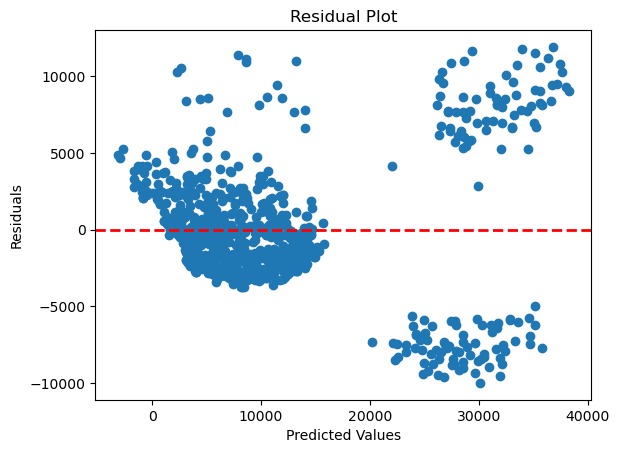

In [34]:
X = df_encoded.drop("Cost ($)", axis=1)  # Features excluding the target column
y = df_encoded["Cost ($)"]  # Target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Training model and visualizing residual plot again
model = LinearRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_train)

residuals = y_train-y_predict

# drawing scatter plot for residuals and predicted values


plt.scatter(y_predict, residuals)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)  # Add a horizontal line at y=0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [49]:

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_train)
print("The scores after removing rows with residual outliers");
# Calculate R-squared (R2)
r2 = r2_score(y_train, y_pred)
print(f"R-squared (R2) for train data: {r2}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_train, y_pred)
print(f"Mean Squared Error (MSE) for train data : {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE) for train data: {rmse}")

The scores after removing rows with residual outliers
R-squared (R2) for train data: 0.8477218125568122
Mean Squared Error (MSE) for train data : 17298861.821074523
Root Mean Squared Error (RMSE) for train data: 4159.190043875673


**Now the mode is a little improved with inccreased r2 and decreased MSE**

### Analysing scores on test data

In [36]:
y_pred = model.predict(X_test)
print("The scores after removing rows with residual outliers");
# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) for train data: {r2}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE) for test data : {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE) for train data: {rmse}")

The scores after removing rows with residual outliers
R-squared (R2) for train data: 0.8349183655026264
Mean Squared Error (MSE) for train data : 19565527.915003527
Root Mean Squared Error (RMSE) for train data: 4423.29378574423


**The model is now doing fine on test data too**

## Further Improvement using Ridge Regularization
**I used Ridge regularization because I don't want to remove the features instead I just want to reduce the coefficients**

In [39]:
alphas = np.logspace(-6, 6, 13)
print(alphas)

[1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03
 1.e+04 1.e+05 1.e+06]


### Finding the best alphas values for Ridge Regularization (hyperparameter tuning)


In [46]:
from sklearn.linear_model import RidgeCV
ridge= RidgeCV(alphas=alphas, cv=10)
ridge.fit(X_train, y_train)
best_alpha = ridge.alpha_
print("Best Alpha:", best_alpha)



Best Alpha: 1.0


### For train data

In [47]:
from sklearn.linear_model import Ridge
ridge_alpha1 = Ridge(alpha= 1)
ridge_alpha1.fit(X_train, y_train)
y_pred = ridge_alpha1.predict(X_train)

r2 = r2_score(y_train, y_pred)
print(f"R-squared (R2) for train data: {r2}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_train, y_pred)
print(f"Mean Squared Error (MSE) for train data : {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE) for train data: {rmse}")

R-squared (R2) for train data: 0.8476728471307924
Mean Squared Error (MSE) for train data : 17304424.31267591
Root Mean Squared Error (RMSE) for train data: 4159.858689027298


### For test data

In [51]:
y_pred = ridge_alpha1.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) for test data: {r2}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE) for test data : {mse}")

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE) for test data: {rmse}")

R-squared (R2) for test data: 0.8351435671255549
Mean Squared Error (MSE) for test data : 19538836.94690567
Root Mean Squared Error (RMSE) for test data: 4420.275664130651


***Although I performed ridge regularization there is not much improvement in metrics(R2,MSE)***

### Trying Random Forest Regressor to compare the metrics with those of linear regression

In [56]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
kfold = KFold(n_splits=num_splits, shuffle=True, random_state=42)
# Cross validation for mean squared error and finding the mean of mse
cv_scores_mse = cross_val_score(rf_model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
cv_scores_mse = -cv_scores_mse
mean_cv_mse = np.mean(cv_scores_mse)

# Cross validation for mean squared error and finding the mean of mse
cv_scores_r2 = cross_val_score(rf_model, X_train, y_train, cv=kfold, scoring='r2')

mean_cv_r2 = np.mean(cv_scores_r2)


print(f"\nMean CV Score for MSE: {mean_cv_mse}")
print(f"Mean score for RMSE: {math.sqrt(mean_cv_mse)}")
print(f"Mean CV Score for r2: {mean_cv_r2}")



Mean CV Score for MSE: 5984089.665547478
Mean score for RMSE: 2446.239903514673
Mean CV Score for r2: 0.9470255823936109


**From the above socres, random forest regressor is doing pretty very well compared to linear regressor**

### Hyperparameter tuning for random forest regressor using Random Search

In [60]:
from sklearn.model_selection import RandomizedSearchCV
rf_model = RandomForestRegressor(random_state=42)


param_dist = {
    'n_estimators': np.arange(50, 150, 10),
    'max_depth': list(np.arange(10, 30, 5)),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

#performing random search
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=10,  # Number of random combinations to try
    cv=kfold,  # Number of cross-validation folds
    scoring='neg_mean_squared_error',  # Evaluation metric
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)


random_search.fit(X_train, y_train)


best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

#getting the best model
best_rf_model = random_search.best_estimator_


y_pred = best_rf_model.predict(X_train)
mse = mean_squared_error(y_train,y_pred)
r2 = r2_score(y_train,y_pred)
print(f"Mean Squared Error on Train Set: {mse}")
print(f"Root Mean Squared Error on Train Set: {math.sqrt(mse)}")
print(f"Mean Squared Error on Train Set: {r2}")

Best Hyperparameters: {'n_estimators': 80, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10, 'bootstrap': True}
Mean Squared Error on Train Set: 2896059.03482596
Root Mean Squared Error on Train Set: 1701.7811359942737
Mean Squared Error on Train Set: 0.9745066106017157


# So Finally, hyperparameter tuning for the Random Forest is done and it also pretty work well on the test data set too. 

In [61]:
y_pred = best_rf_model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"Mean Squared Error on Test Set: {mse}")
print(f"Root Mean Squared Error on Train Set: {math.sqrt(mse)}")
print(f"Mean Squared Error on Test Set: {r2}")

Mean Squared Error on Test Set: 3321306.946920736
Root Mean Squared Error on Train Set: 1822.445320694351
Mean Squared Error on Test Set: 0.9719768982545719


# So, the best model for this regression problem is the Random Forest Regressor with the given parameters mentioned above